<a href="https://colab.research.google.com/github/Rama389/AI-Projects/blob/main/Statistical_Analysis_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 4.What are the average values of wage and IQ in the sample? What are their minimum and maximum values?

In [ ]:
import pandas as pd

# Load the Excel file into a DataFrame
# Assuming the file is an Excel file and named 'Wage2.xlsx'
# If your file has a different name or is in a different location, please update the path
try:
    df = pd.read_excel('Wage2.xlsx')

    # Calculate the mean, minimum, and maximum values for 'wage' and 'IQ'
    wage_stats = df['wage'].agg(['mean', 'min', 'max'])
    iq_stats = df['IQ'].agg(['mean', 'min', 'max'])

    # Print the results
    print("Wage Statistics:")
    print(wage_stats)
    print("\nIQ Statistics:")
    print(iq_stats)

except FileNotFoundError:
    print("Error: The file 'Wage2.xlsx' was not found.")
    print("Please make sure the file is in the correct directory or update the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

Wage Statistics:
mean     928.697175
min      115.000000
max     3078.000000
Name: wage, dtype: float64

IQ Statistics:
mean    101.00452
min      50.00000
max     145.00000
Name: IQ, dtype: float64


### 5.Obtain a scatterplot of wage and IQ. What kind of relationship is indicated by this scatterplot in terms of (a) direction, (b) linearity, and (c) strength?

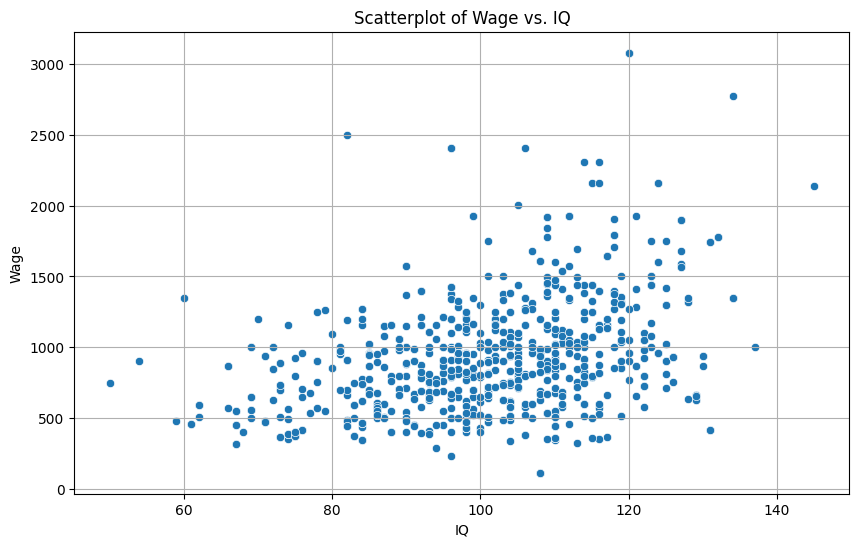

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_excel('Wage2.xlsx')

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IQ', y='wage', data=df)
plt.title('Scatterplot of Wage vs. IQ')
plt.xlabel('IQ')
plt.ylabel('Wage')
plt.grid(True)
plt.show() # Use plt.show() to display the plot if running locally, or plt.savefig() to save it.

Comments:
1. The direction is in positive direction. As the IQ is increasing the wage is also increasing.
2. The linear equation is established b/w the wage and IQ.
3. The strength is moderate as there is spread and not high correlation is established.

### 6.What is the correlation coefficient between wage and IQ? Is this what you expected based on your characterization in part 5?

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_excel('Wage2.xlsx')

# Calculate the correlation coefficient between wage and IQ
correlation = df['wage'].corr(df['IQ'])

# Print the correlation coefficient
print(f"The correlation coefficient between wage and IQ is: {correlation}")

The correlation coefficient between wage and IQ is: 0.3725478690456941


###7.Estimate the model in (1) using OLS.
(a) Interpret the estimated intercept ˆ β0.

(b) Interpret the estimated slope ˆ β1.

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Load the CSV file into a DataFrame
df = pd.read_excel('Wage2.xlsx')

# Estimate the OLS model: wage = β0 + β1IQ + u
# 'wage' is the dependent variable, 'IQ' is the independent variable
model = smf.ols(formula='wage ~ IQ', data=df)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     142.3
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           1.60e-30
Time:                        09:36:50   Log-Likelihood:                -6469.8
No. Observations:                 885   AIC:                         1.294e+04
Df Residuals:                     883   BIC:                         1.295e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -44.6541     82.499     -0.541      0.5

### 11.What are the average, minimum, and maximum values of educ in the sample?

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_excel('Wage2.xlsx')

# Calculate the mean, minimum, and maximum values for 'educ'
educ_stats = df['educ'].agg(['mean', 'min', 'max'])

# Print the results
print("Education Statistics:")
print(educ_stats)

Education Statistics:
mean    13.474576
min      9.000000
max     18.000000
Name: educ, dtype: float64


###12.Estimate the model in (2) using OLS.
(a) Interpret the estimated intercept ˆ β0. Does the intercept make sense?
Why might you be observing such an estimate?

(b) Interpret the estimated coefficients ˆ β1 and ˆ β2.

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Load the CSV file into a DataFrame
df = pd.read_excel('Wage2.xlsx')

# Estimate the OLS model: wage = β0 + β1IQ + β2educ + u
# 'wage' is the dependent variable, 'IQ' and 'educ' are the independent variables
model_2 = smf.ols(formula='wage ~ IQ + educ', data=df)
results_2 = model_2.fit()

# Print the summary of the regression results for Model 2
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     94.31
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           7.61e-38
Time:                        10:50:44   Log-Likelihood:                -6450.1
No. Observations:                 885   AIC:                         1.291e+04
Df Residuals:                     882   BIC:                         1.292e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -270.2086     88.254     -3.062      0.0

### 13. Regress educ on IQ and verify the omitted variable bias formula
˜ β1 = ˆ β1 + ˆ β2˜δ1,


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Load the CSV file into a DataFrame
df = pd.read_excel('Wage2.xlsx')

# --- Step 1: Retrieve coefficients from previous regressions ---
# Coefficient of IQ from simple regression (Model 1: wage ~ IQ)
# Re-running the simple regression to ensure exact float precision
model_simple = smf.ols(formula='wage ~ IQ', data=df)
results_simple = model_simple.fit()
beta1_tilde = results_simple.params['IQ']

# Coefficients from multiple regression (Model 2: wage ~ IQ + educ)
# Re-running the multiple regression to ensure exact float precision
model_multiple = smf.ols(formula='wage ~ IQ + educ', data=df)
results_multiple = model_multiple.fit()
beta1_hat = results_multiple.params['IQ']
beta2_hat = results_multiple.params['educ']

print(f"beta1_tilde (from wage ~ IQ): {beta1_tilde}")
print(f"beta1_hat (from wage ~ IQ + educ): {beta1_hat}")
print(f"beta2_hat (from wage ~ IQ + educ): {beta2_hat}")

# --- Step 2: Regress educ on IQ to find ˜δ1 ---
model_auxiliary = smf.ols(formula='educ ~ IQ', data=df)
results_auxiliary = model_auxiliary.fit()
delta1_tilde = results_auxiliary.params['IQ']

print(f"\ndelta1_tilde (from educ ~ IQ): {delta1_tilde}")

# --- Step 3: Verify the omitted variable bias formula ---
# Formula: ˜ β1 = ˆ β1 + ˆ β2˜δ1

lhs = beta1_tilde
rhs = beta1_hat + beta2_hat * delta1_tilde

print(f"\nLeft Hand Side (˜ β1): {lhs}")
print(f"Right Hand Side (ˆ β1 + ˆ β2˜δ1): {rhs}")

# Check for equality, allowing for a small floating-point tolerance
tolerance = 1e-9
if abs(lhs - rhs) < tolerance:
    print("\nThe omitted variable bias formula is verified: LHS is approximately equal to RHS.")
else:
    print("\nThe omitted variable bias formula is NOT verified (difference is too large).")
    print(f"Difference: {abs(lhs - rhs)}")

beta1_tilde (from wage ~ IQ): 9.6367098331218
beta1_hat (from wage ~ IQ + educ): 6.3798084808783875
beta2_hat (from wage ~ IQ + educ): 41.152780530930414

delta1_tilde (from educ ~ IQ): 0.0791417082934536

Left Hand Side (˜ β1): 9.6367098331218
Right Hand Side (ˆ β1 + ˆ β2˜δ1): 9.636709833121799

The omitted variable bias formula is verified: LHS is approximately equal to RHS.


###14.What is the predicted wage of the first individual in the sample according to the estimate of model in (2)? Is this individual overpaid or underpaid?

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_excel('Wage2.xlsx')

# Get the data for the first individual
first_individual = df.iloc[0]
actual_wage = first_individual['wage']
iq = first_individual['IQ']
educ = first_individual['educ']

# Estimated coefficients from Model 2 (from previous output)
beta0_hat = -270.2086
beta1_hat = 6.3798
beta2_hat = 41.1528

# Predict the wage for the first individual using Model 2
predicted_wage = beta0_hat + (beta1_hat * iq) + (beta2_hat * educ)

# Determine if the individual is overpaid or underpaid
status = ""
if actual_wage > predicted_wage:
    status = "overpaid"
elif actual_wage < predicted_wage:
    status = "underpaid"
else:
    status = "exactly paid as predicted"

# Print the results
print(f"First individual's actual wage: ${actual_wage:.2f}")
print(f"First individual's IQ: {iq}")
print(f"First individual's education (years): {educ}")
print(f"Predicted wage for the first individual (Model 2): ${predicted_wage:.2f}")
print(f"This individual is {status}.")

First individual's actual wage: $700.00
First individual's IQ: 99
First individual's education (years): 12
Predicted wage for the first individual (Model 2): $855.23
This individual is underpaid.
